## Helicity and emf analysis

$h_k = \boldsymbol{u \cdot \omega}$, $~$ $h_m = \boldsymbol{a \cdot b}$, $~$ $h_c = \boldsymbol{u \cdot b}$, $~$ $\mathcal{E}_x = (\boldsymbol{u \times b})_x$

$\langle \sim \rangle$ denotes averaging in planes perpendicular to the rotation vector

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import helicity as helicity

plt.style.use('benmc')
sub = 'le1e-8/'
inpath = '/vistabella/BRM35_4T/hirm_long/'
outpath = '/home/brm35/work/hirm/cloud/long/'

Spatial resolution and grid. Note we swap [X,Y,Z] -> [z,x,y] to have $\Omega \hat{e}_z$, $\mathrm{g} \hat{e}_y$ and $B_0 \hat{e}_x$.

In [3]:
NX = 512
NY = 512
NZ = 4*NX
shape = (NZ,NX,NY)
delta = 0.125
x = np.linspace(-np.pi,np.pi,NX) / delta
z = np.linspace(-5.0*np.pi,5.0*np.pi,NZ) / delta

**Kinetic helicity** - case = 1 for helicity function.

$\langle h_k \rangle(z,t) = \langle \boldsymbol{u \cdot \omega} \rangle$


In [4]:
case = 1
hkav = np.zeros((NZ,5))
j = 0

for i in range(3,11+2,2):
    hk = helicity.helicity(inpath+sub,i,shape,case)
    hkav[:,j] = np.mean(np.mean(hk, axis=1), axis=1)
    j += 1


AttributeError: 'Line2D' object has no property 'cmap'

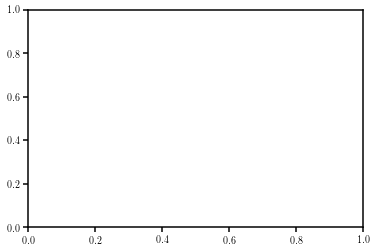

In [11]:
plt.figure()
plt.plot(z,hkav)
plt.xlim(-50,50)
plt.xlabel(r'$z/\delta$')
plt.ylabel(r'$\langle h_k \rangle$')
